In [44]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.stats import chisquare
import pandas as pd

pl.rcParams['figure.figsize'] = (16, 5)
pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

In [53]:
data = pd.read_csv("/home/hbueno/Área de Trabalho/densidade.csv", sep=",")
xdata = np.arange(2.0, 15.0, 0.5) # dá pra fazer o mesmo que fiz em y
ydata = np.asarray(data.densidade)
yerro = np.asarray(data.erro)

In [33]:
#Modelos
def linear_fit(x, m, b):
    return m*x + b
def gaussian_fit(x, q):
    return np.exp(-q*x**2)
def plummer_model(r, r_plum, M_tot, bg):
    return M_tot/(r_plum**3) * np.power(1+r**2/r_plum**2, -5/2) + bg

In [55]:
init_guess =[3.,100, 1] #Array com chutes para cada parâmetro
fit=curve_fit(plummer_model, xdata, ydata, sigma=yerro, p0=init_guess, absolute_sigma=True)
ans, cov = fit
print(ans, '\n\n', cov)
#Output são meus 3 valores de parâmetros e a matrix de covariancia, a incerteza dos parametros é:
# np.sqrt(np.diag(ans))

[4.37893707e+00 1.55671721e+02 8.36102592e-02] 

 [[ 9.78695104e-02  2.92622330e+00 -6.45657391e-04]
 [ 2.92622330e+00  1.82441722e+02 -3.11196995e-02]
 [-6.45657391e-04 -3.11196995e-02  1.37939769e-05]]


In [43]:
#Somatorio do observado-modelo define chi quadrado
def chi2(r_plum,M,bg):
    return np.sum((ydata-plummer_model(xdata,r_plum,M,bg))**2/yerro**2)

alpha = 0.05 # 95% confidence interval = 100*(1-alpha)

n = len(ydata)    # number of data points
p = len(ans) # number of parameters

dof = max(0, n - p) # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 

for i, p,var in zip(range(n), ans, np.diag(cov)):
    sigma = var**0.5
    print ('p{0}: {1} [{2}  {3}]'.format(i, p,
                                  p - sigma*tval,
                                  p + sigma*tval))

p0: 4.3789370668807726 [3.7317760881024746  5.0260980456590705]
p1: 155.67172118670004 [127.73015818326684  183.61328419013324]
p2: 0.08361025917562383 [0.07592721443075294  0.09129330392049471]


In [47]:
# O chi quadrado reduzido para meu ajuste:
chi2(ans[0], ans[1], ans[2])/len(xdata-2)

0.9117348983845734

In [12]:
x_plots = np.linspace(2.,15,100) # vetor para plotar o modelo 

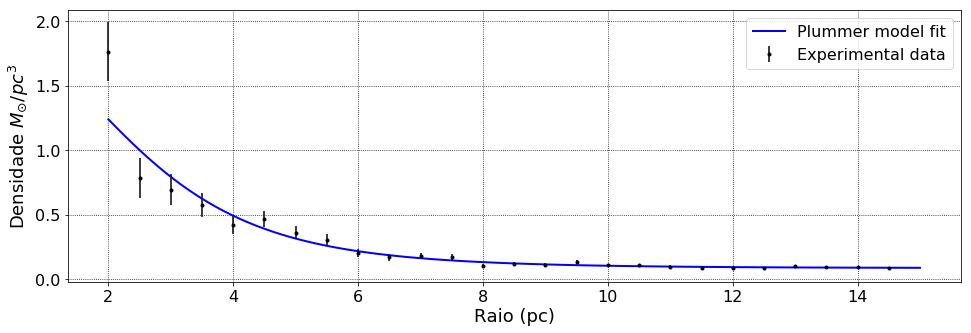

In [56]:
pl.errorbar(xdata, ydata, yerr=yerro, fmt='.',c='k',label=r'Experimental data')
pl.plot(x_plots,plummer_model(x_plots, ans[0], ans[1], ans[2]),c='b',lw=2,label=r'Plummer model fit')
pl.xlabel(r'Raio (pc)', fontsize=18)
pl.ylabel(r'Densidade $M_{\odot}/pc^3$', fontsize=18)
pl.legend(loc="upper right",fontsize = 16)
pl.grid(ls=':',c='k')

In [ ]:
# Exportando para csv para jogar no moodle:
data = {'X':xdata, 'erro X':x_erro}
df = pd.DataFrame(data, columns=['X', 'erro X'])
df.to_csv('Export_to_moodle.csv')

In [45]:
chisquare(ydata, plummer_model(xdata, ans[0],ans[1],ans[2]))

Power_divergenceResult(statistic=0.35036962604657457, pvalue=1.0)